The American Technology sector is one of the top industries in the world. It is notable for making breakthroughs in computing and software, rapidly changing and improving the lives of billions. These corporations are some of the wealthiest of any industry.

How have the stocks of the leading American Technology companies performed over the last year? What was the change in price of these stocks from September 2016 to September 2017? What was the correlation between different stocks daily returns? Closing prices?

In [1]:
#Imports
import warnings
warnings.simplefilter('ignore',FutureWarning)

#For Data Analysis:
import pandas as pd
import numpy as np
import datetime 
import statsmodels
from pandas_datareader import data, wb
from pandas import Series,DataFrame

In [2]:
#For visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(15,9)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Set the date range
start = datetime.datetime(2016,9,10)
end = datetime.datetime(2017,9,10)

In [4]:
#Collect financial data from the web

apple = data.DataReader("AAPL", "google", start, end)

google = data.DataReader("GOOG", "google", start,end)

amazon = data.DataReader("AMZN", "google", start, end)

microsoft = data.DataReader("MSFT","google", start, end)

IBM = data.DataReader("IBM", "google", start, end)

HP = data.DataReader("HPE", "google", start, end)

In [5]:
type(apple)

pandas.core.frame.DataFrame

In [6]:
apple.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,139.381474,140.304622,138.494263,139.488327,2.805794e+07
std,17.106701,17.101638,16.891555,16.951448,1.193381e+07
min,106.570000,107.680000,104.080000,105.710000,1.147592e+07
25%,120.435000,121.100000,120.025000,120.715000,2.082378e+07
50%,143.720000,144.500000,143.100000,143.700000,2.559729e+07
75%,153.880000,154.450000,152.900000,153.805000,3.195864e+07
max,164.800000,164.940000,163.630000,164.050000,1.119850e+08


In [7]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-24,117.10,117.74,117.00,117.65,23538673
2016-10-25,117.95,118.36,117.31,118.25,48128970
2016-10-26,114.31,115.70,113.31,115.59,66134219
2016-10-27,115.39,115.86,114.10,114.48,34562045
2016-10-28,113.87,115.21,113.45,113.72,37861662


In [8]:
apple.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-16,157.90,160.00,157.65,159.88,24121452
2017-10-17,159.78,160.87,159.23,160.47,18997275
2017-10-18,160.42,160.71,159.60,159.76,16374164
2017-10-19,156.75,157.08,155.02,155.98,42584166
2017-10-20,156.61,157.75,155.96,156.25,23974146


In [9]:
closing_df = data.DataReader(["AAPL", "GOOG", "AMZN", "MSFT", "IBM", "HPE"], "google",start,end)["Close"]

In [10]:
closing_df

,AAPL,AMZN,GOOG,HPE,IBM,MSFT
Date,,,,,,
2016-10-24,117.65,838.09,813.11,21.68,150.57,61.00
2016-10-25,118.25,835.18,807.67,21.60,150.88,60.99
2016-10-26,115.59,822.59,799.07,21.80,151.81,60.63
2016-10-27,114.48,818.36,795.35,22.19,153.35,60.10
2016-10-28,113.72,776.32,795.37,22.17,152.61,59.87
2016-10-31,113.54,789.82,784.54,22.47,153.69,59.92
2016-11-01,111.49,785.41,783.61,22.08,152.79,59.80
2016-11-02,111.59,765.56,768.70,22.02,151.95,59.43
2016-11-03,109.83,767.03,762.13,21.80,152.37,59.21


Amazon and Google have extremely valuable stock, both are near a $1,000 in value as of September 2017. Apple and IBM have moderately expensive stocks, while HPE and Microsoft are more average.

Apple, Amazon, Google and Microsoft all had positive stock price growth. Apple stock value increased by 38% , Amazon and Microsoft by about 30% and Google by 21% The stock value of HPE was cut almost in half. IBM stock value decreased as well but only by about 6%.

HPE had that largest standard deviation in this set, which means its price changed the most as compared to its peers. Apple and Amazon had the second highest, while IBM, Google and Microsoft had the lowest or the least amount of change.

Stock Performance

How have the stocks of the leading technology companies been doing over the last year?

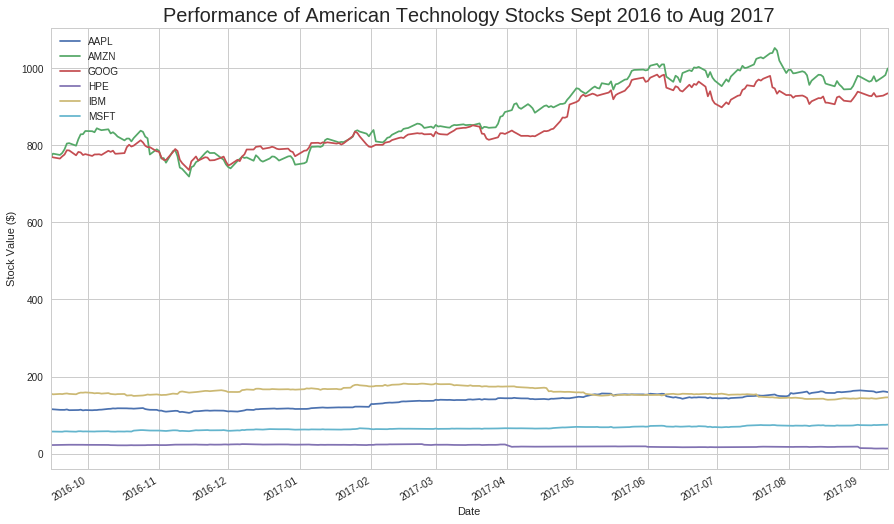

In [66]:
#Performance

closing_plot = closing_df.plot(grid=True)

closing_plot.set_title('Performance of American Technology Stocks Sept 2016 to Aug 2017', fontsize=20)

closing_plot.set_ylabel('Stock Value ($)')

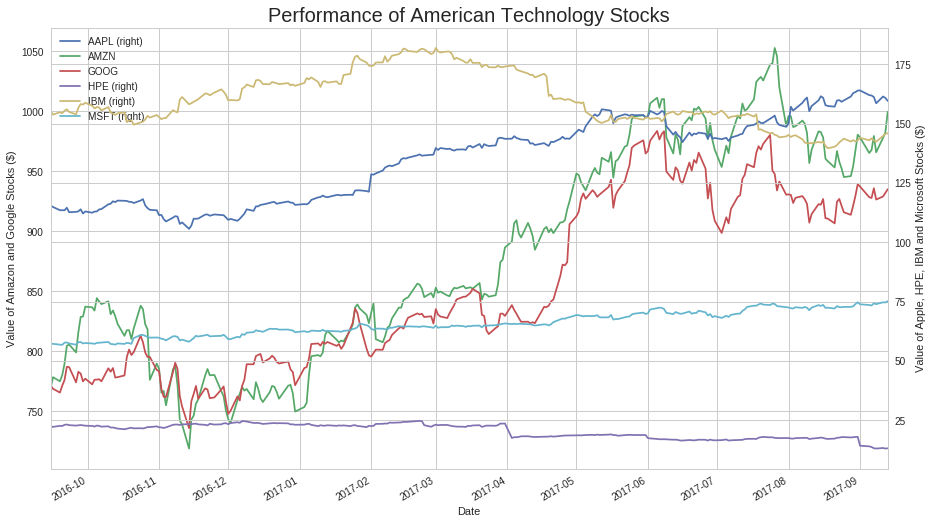

In [67]:
closing_secondary = closing_df.plot(secondary_y = ['AAPL','HPE','IBM','MSFT'],grid=True)

closing_secondary.set_title('Performance of American Technology Stocks',fontsize=20)

closing_secondary.set_ylabel('Value of Amazon and Google Stocks ($)')

closing_secondary.right_ax.set_ylabel('Value of Apple, HPE, IBM and Microsoft Stocks ($)')

Alphabet, Amazon, Google and Microsoft have had a strong year and earned a higher stock value this September compared with last September. IBM and HPE had a worse year, with stock values lower than what they started with.

In [68]:
closing_df.head(1)

,AAPL,AMZN,GOOG,HPE,IBM,MSFT
Date,,,,,,
2016-09-15,115.57,769.69,771.76,22.13,155.66,57.19


In [69]:
closing_df.tail(1)

,AAPL,AMZN,GOOG,HPE,IBM,MSFT
Date,,,,,,
2017-09-13,159.65,999.6,935.09,13.23,145.99,75.21


In [70]:
#Stock Growth

stock_return = closing_df.apply(lambda x : x / x[0])
stock_return.head()

,AAPL,AMZN,GOOG,HPE,IBM,MSFT
Date,,,,,,
2016-09-15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-09-16,0.994376,1.011472,0.996268,1.005874,0.988308,1.001049
2016-09-19,0.982781,1.007029,0.992148,1.024853,0.994925,0.995454
2016-09-20,0.982694,1.013681,0.999546,1.022142,0.992227,0.993355
2016-09-21,0.982521,1.026049,1.005779,1.044736,0.999165,1.009967


Stock Growth

If September 2016 is set as a baseline, what does a visualization of the stock growth look like?

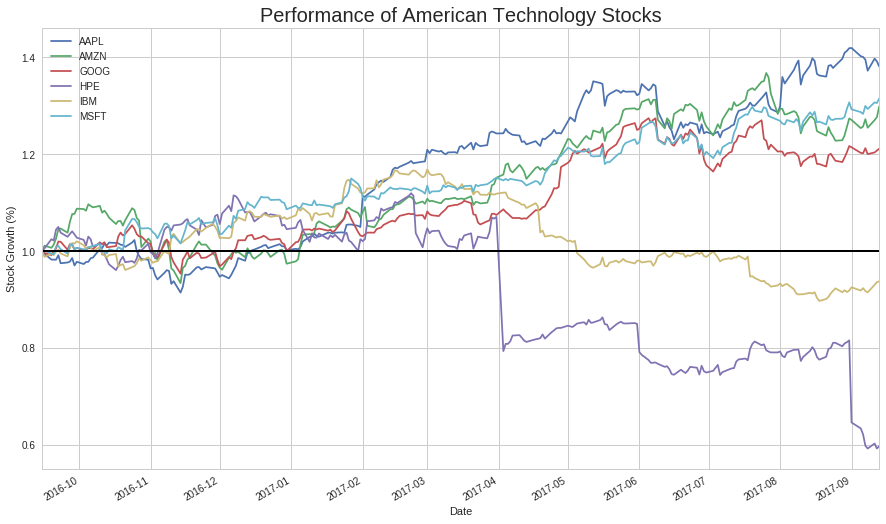

In [71]:
stock_return_plot = stock_return.plot(grid=True)

stock_return_plot.axhline(y = 1, color='black', lw = 2)

stock_return_plot.set_ylabel('Stock Growth (%)')

stock_return_plot.set_title('Performance of American Technology Stocks', fontsize=20)

This graph more clearly illustrates the outcome of tech stock values by the end of the 12 month period. It shows how hard HPE and IBM were hit. HPE saw their most dramatic stock price reductions in June and August. Apple soared above the pack.

Industry Correlations

Are these companies correlated? Do the value points of their stocks move in the same direction?  To investigate correlation, this analysis will utilize stocks’ daily returns and closing prices.

In [72]:
#Industry Correlations
apple['Daily Return'] = apple['Close'].pct_change()

amazon['Daily Return'] = amazon['Close'].pct_change()

google['Daily Return'] = google['Close'].pct_change()

HP['Daily Return'] = HP['Close'].pct_change()

IBM['Daily Return'] = IBM['Close'].pct_change()

microsoft['Daily Return'] = microsoft['Close'].pct_change()

In [73]:
tech_rets = closing_df.pct_change()

Returns 

What are the correlation coefficients for the daily returns?

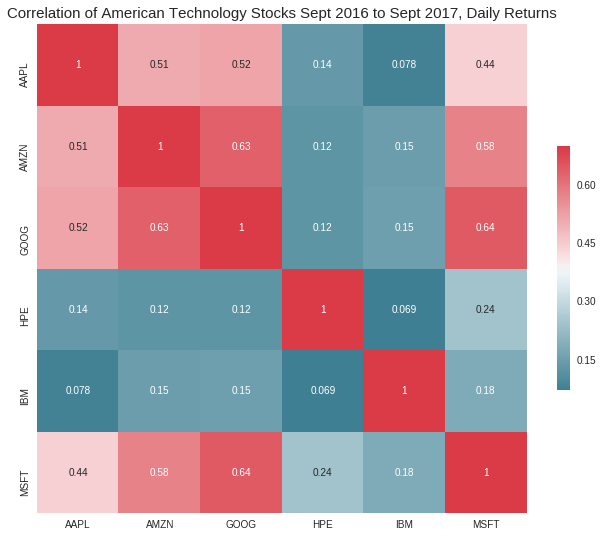

In [74]:
#Daily Return Correlations

corr = tech_rets.corr()

f,ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220,10,as_cmap=True)

h = sns.heatmap(corr,cmap=cmap,vmax=0.7,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of American Technology Stocks Sept 2016 to Sept 2017, Daily Returns',fontsize=15)

The range of possible correlation coefficients is between 0 and 1. A coefficient of .45 or greater represents a moderate to strong positive correlation while anything between a .45 and 0 represents a weak correlation.

The heatmap above depicts moderate to strong correlation in red and a weak correlation in blue. Apple and IBM have weak return correlations  while Microsoft and Google have the strongest.

What do the returns correlations look like graphically?

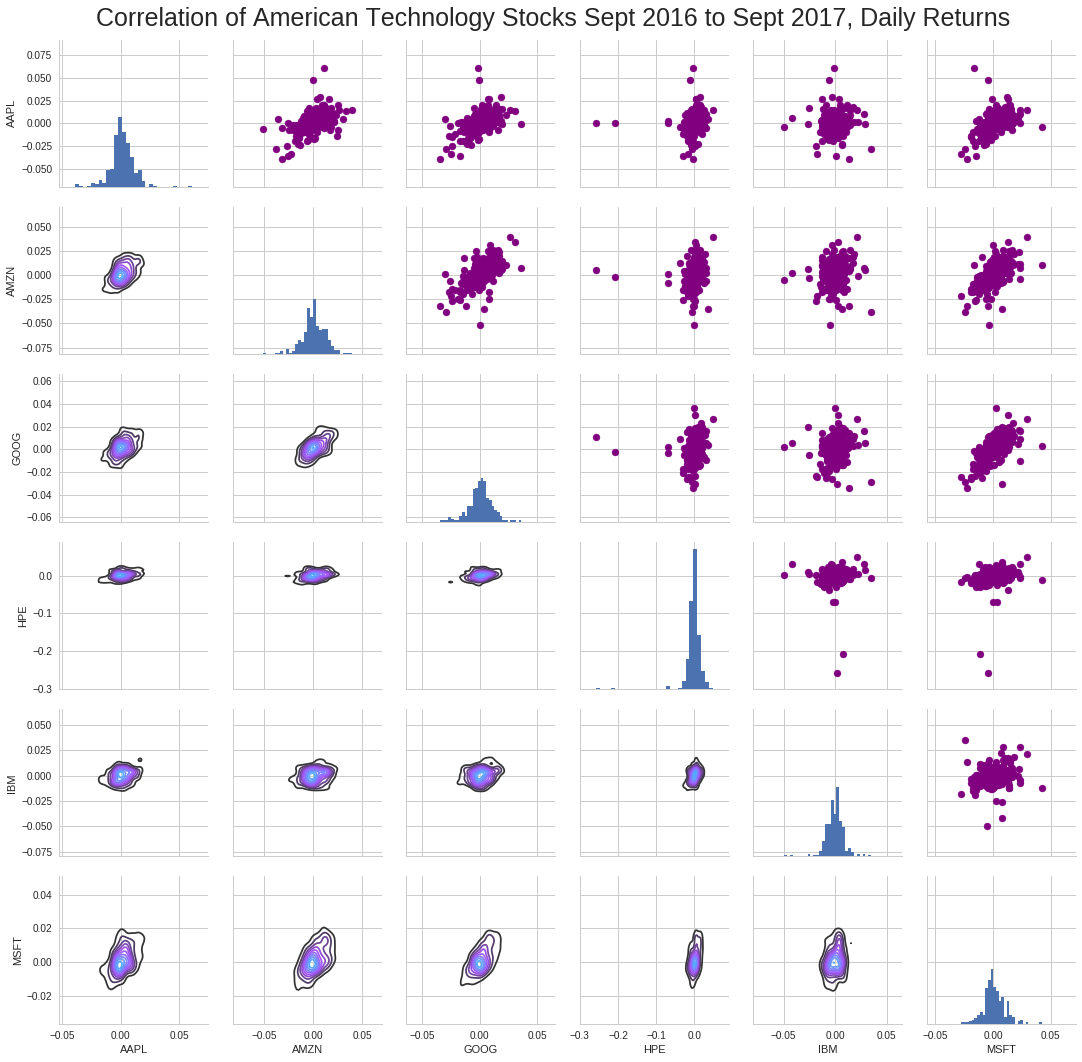

In [75]:
returns_fig = sns.PairGrid(tech_rets.dropna())

plt.subplots_adjust(top=0.95)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

returns_fig.fig.suptitle('Correlation of American Technology Stocks Sept 2016 to Sept 2017, Daily Returns', fontsize=25)

This graph combines scatter, histogram and kernel density estimate (KDE) plots.

Microsoft and Google have positive linear scatter plots and KDEs which illustrates the high density of their correlations.

Closing Price 

What are the correlation coefficients for closing price?

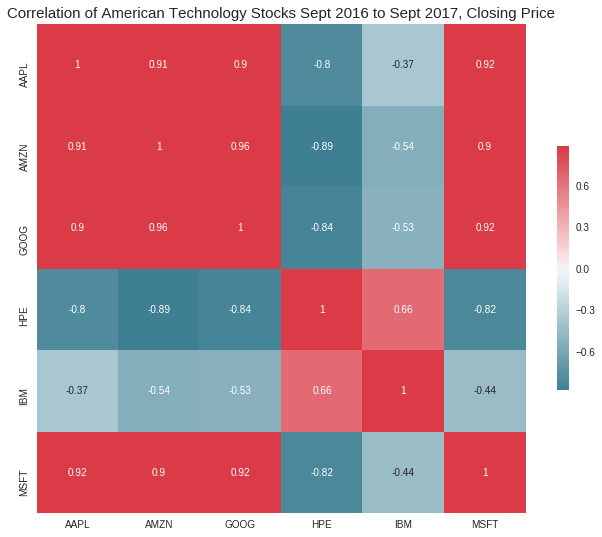

In [76]:
#Closing Price Correlations

second_corr = closing_df.corr()

f,ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(220,10, as_cmap=True)

h = sns.heatmap(second_corr,cmap=cmap,vmax=0.7,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of American Technology Stocks Sept 2016 to Sept 2017, Closing Price', fontsize=15)

The closing price for Google, Amazon, Apple, Microsoft are very highly correlated.

What do the closing price correlations look like graphically?

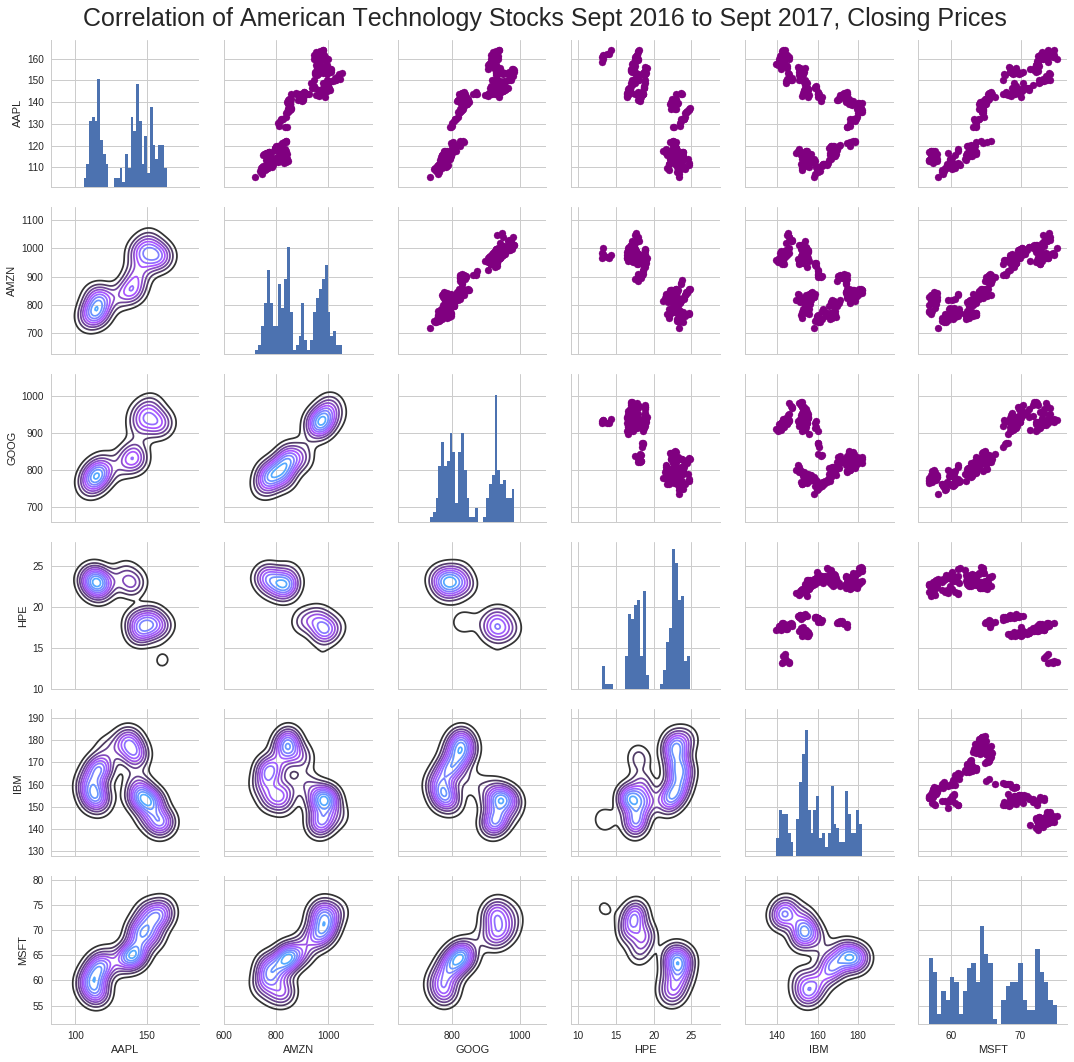

In [77]:
close_fig = sns.PairGrid(closing_df.dropna())

plt.subplots_adjust(top=0.95)

close_fig.map_upper(plt.scatter,color='purple')

close_fig.map_lower(sns.kdeplot,cmap='cool_d')

close_fig.map_diag(plt.hist,bins=30)

close_fig.fig.suptitle('Correlation of American Technology Stocks Sept 2016 to Sept 2017, Closing Prices',fontsize=25)

The scatter and KDE plots show positive highly linear relationship between Google, Amazon, Apple, Microsoft. HPE and IBM have nebulous graphs.

It seems that companies that produce software or internet services have a very close relationship and have almost no correlation with hardware manufacturers .

Conclusions

Apple, Amazon, Google and Microsoft have had a very strong year. In absolute terms, Amazon and Google have incredibly high stock prices, nearly a $1,000. In terms of growth, Apple outperformed its peers with 39% growth in price. HPE had a devastating year, losing nearly half of its stock value.

In short, it was a stellar time for internet companies such as Amazon and Google, a good time for hybrid software/hardware makers such as Apple and Microsoft, and a bad time for pure hardware makers such as HPE and IBM.